In [23]:
from IPython.display import Image, display, HTML
from mira.modeling import Model
from mira.modeling.viz import GraphicalModel
from mira.metamodel import Concept
from pathlib import Path
import json
from pydantic.json import pydantic_encoder

This is the model given as a DOI at the top of Scenario 1


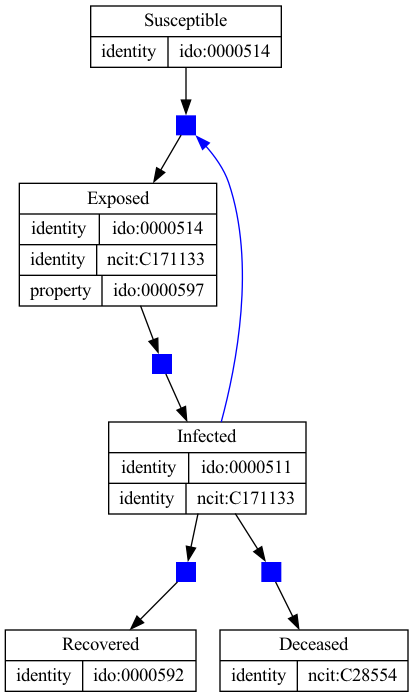

In [24]:
from mira.sources.biomodels import get_template_model

model_1 = get_template_model('BIOMD0000000974')

GraphicalModel.for_jupyter(model_1, width="30%")

The second model requested is the first one that's been stratified by vaccination status

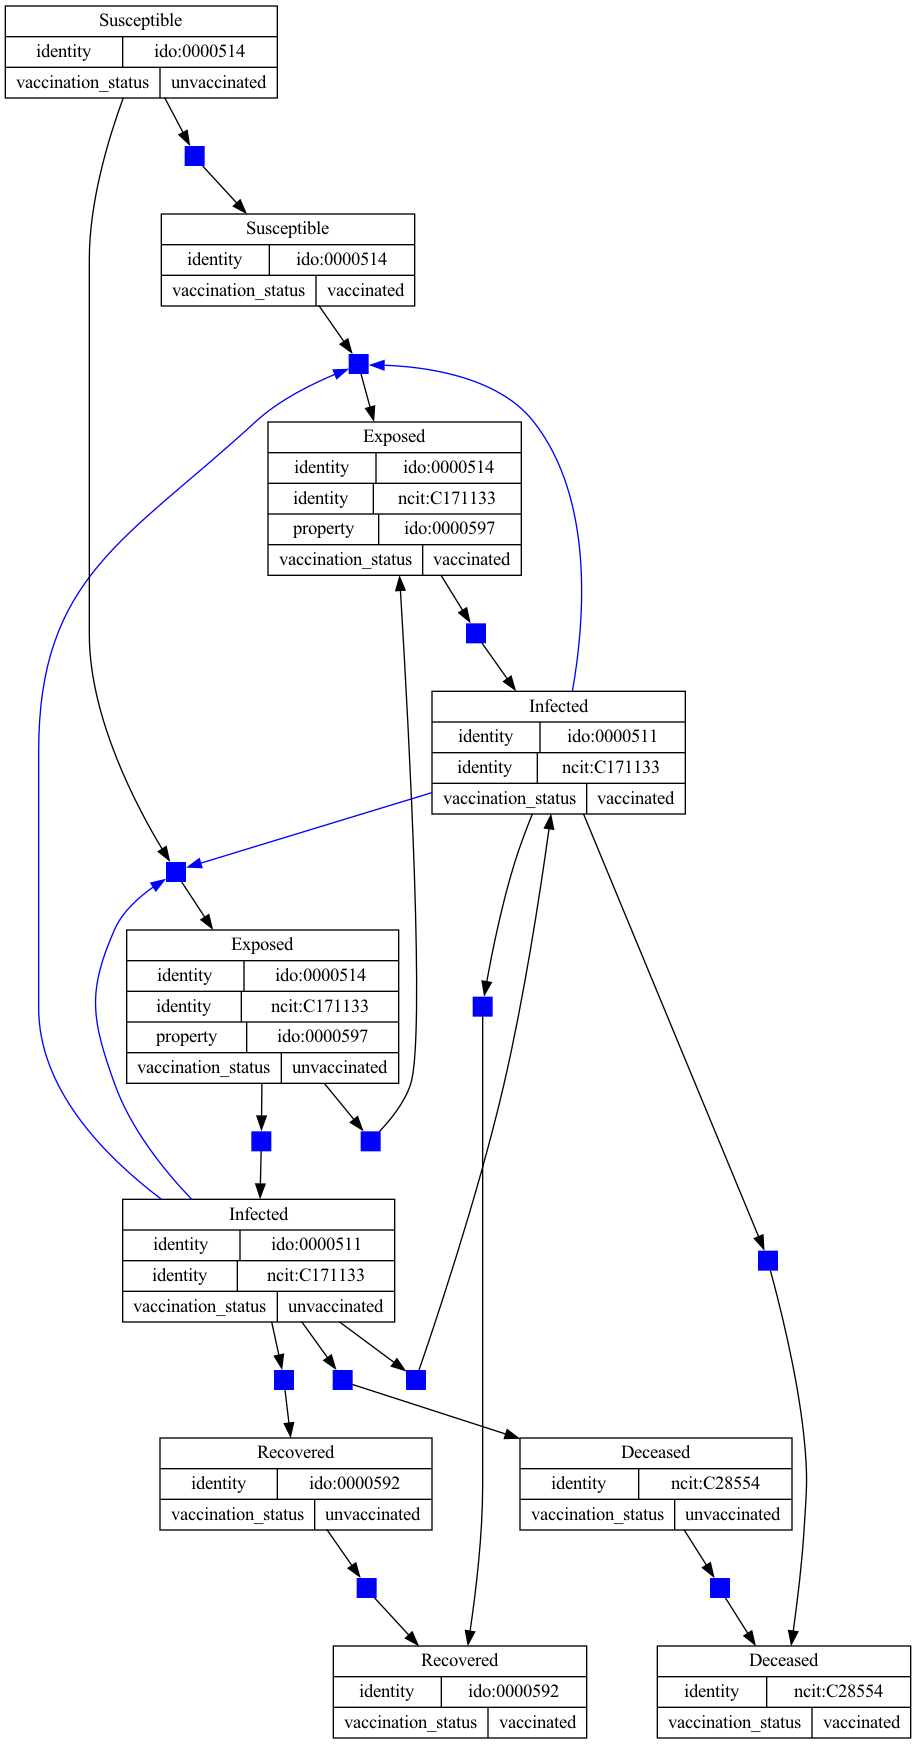

In [26]:
from mira.metamodel.ops import stratify

model_2 = stratify(
    model_1, 
    key="vaccination_status", 
    strata={"vaccinated", "unvaccinated"},
    structure=[("unvaccinated", "vaccinated")],
    directed=True,
    cartesian_control=True,
)

GraphicalModel.for_jupyter(model_2, width="50%")

This is the model mentioned in Scenario 1 task 3 for model comparison, subheading A-i

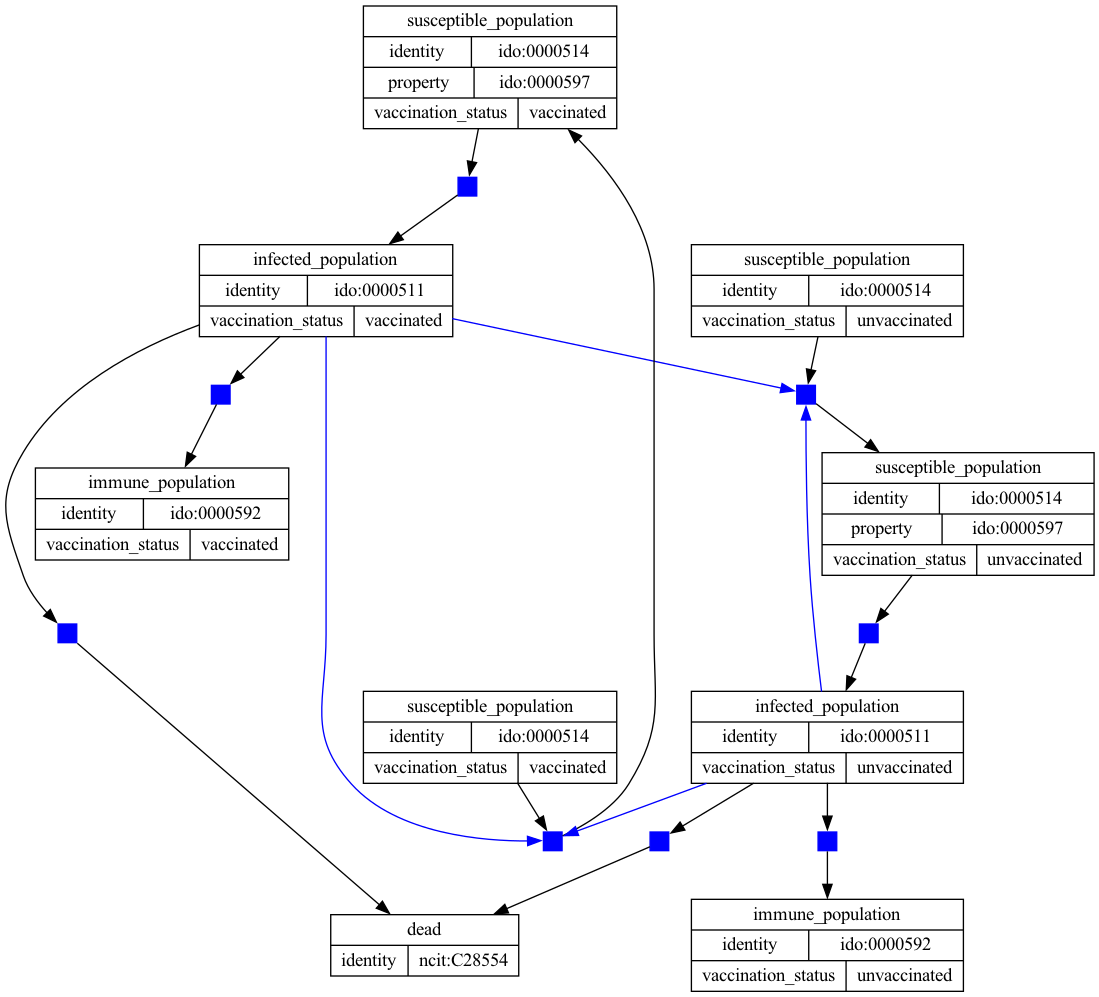

In [27]:
from mira.examples.jin2022 import seird_stratified
GraphicalModel.for_jupyter(seird_stratified, width="80%")

The third model is the CHIME SVIIvR (which adds vaccination to the original CHIME model)

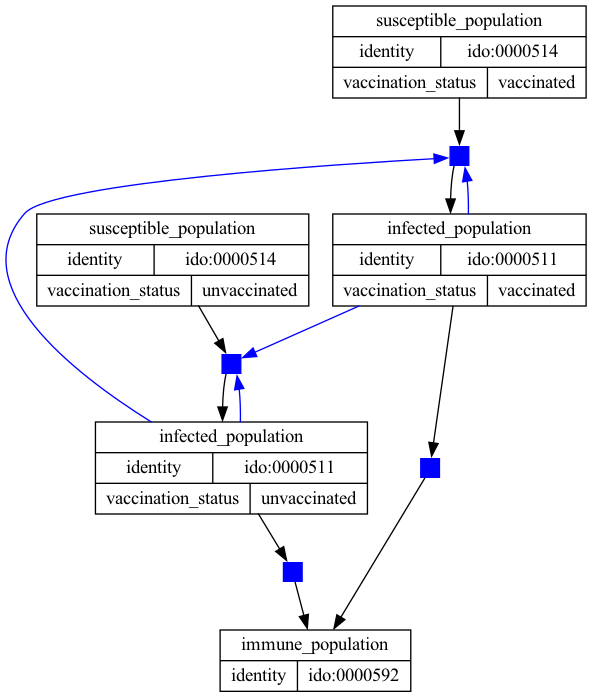

In [28]:
from mira.examples.chime import sviivr
GraphicalModel.for_jupyter(sviivr, width="60%")

# Comparison

In [29]:
from mira.metamodel import TemplateModelDelta
from IPython.display import Image
from mira.metamodel import get_dkg_refinement_closure
refinement_fun = get_dkg_refinement_closure().is_ontological_child

#from mira.dkg.web_client import is_ontological_child_web as refinement_fun

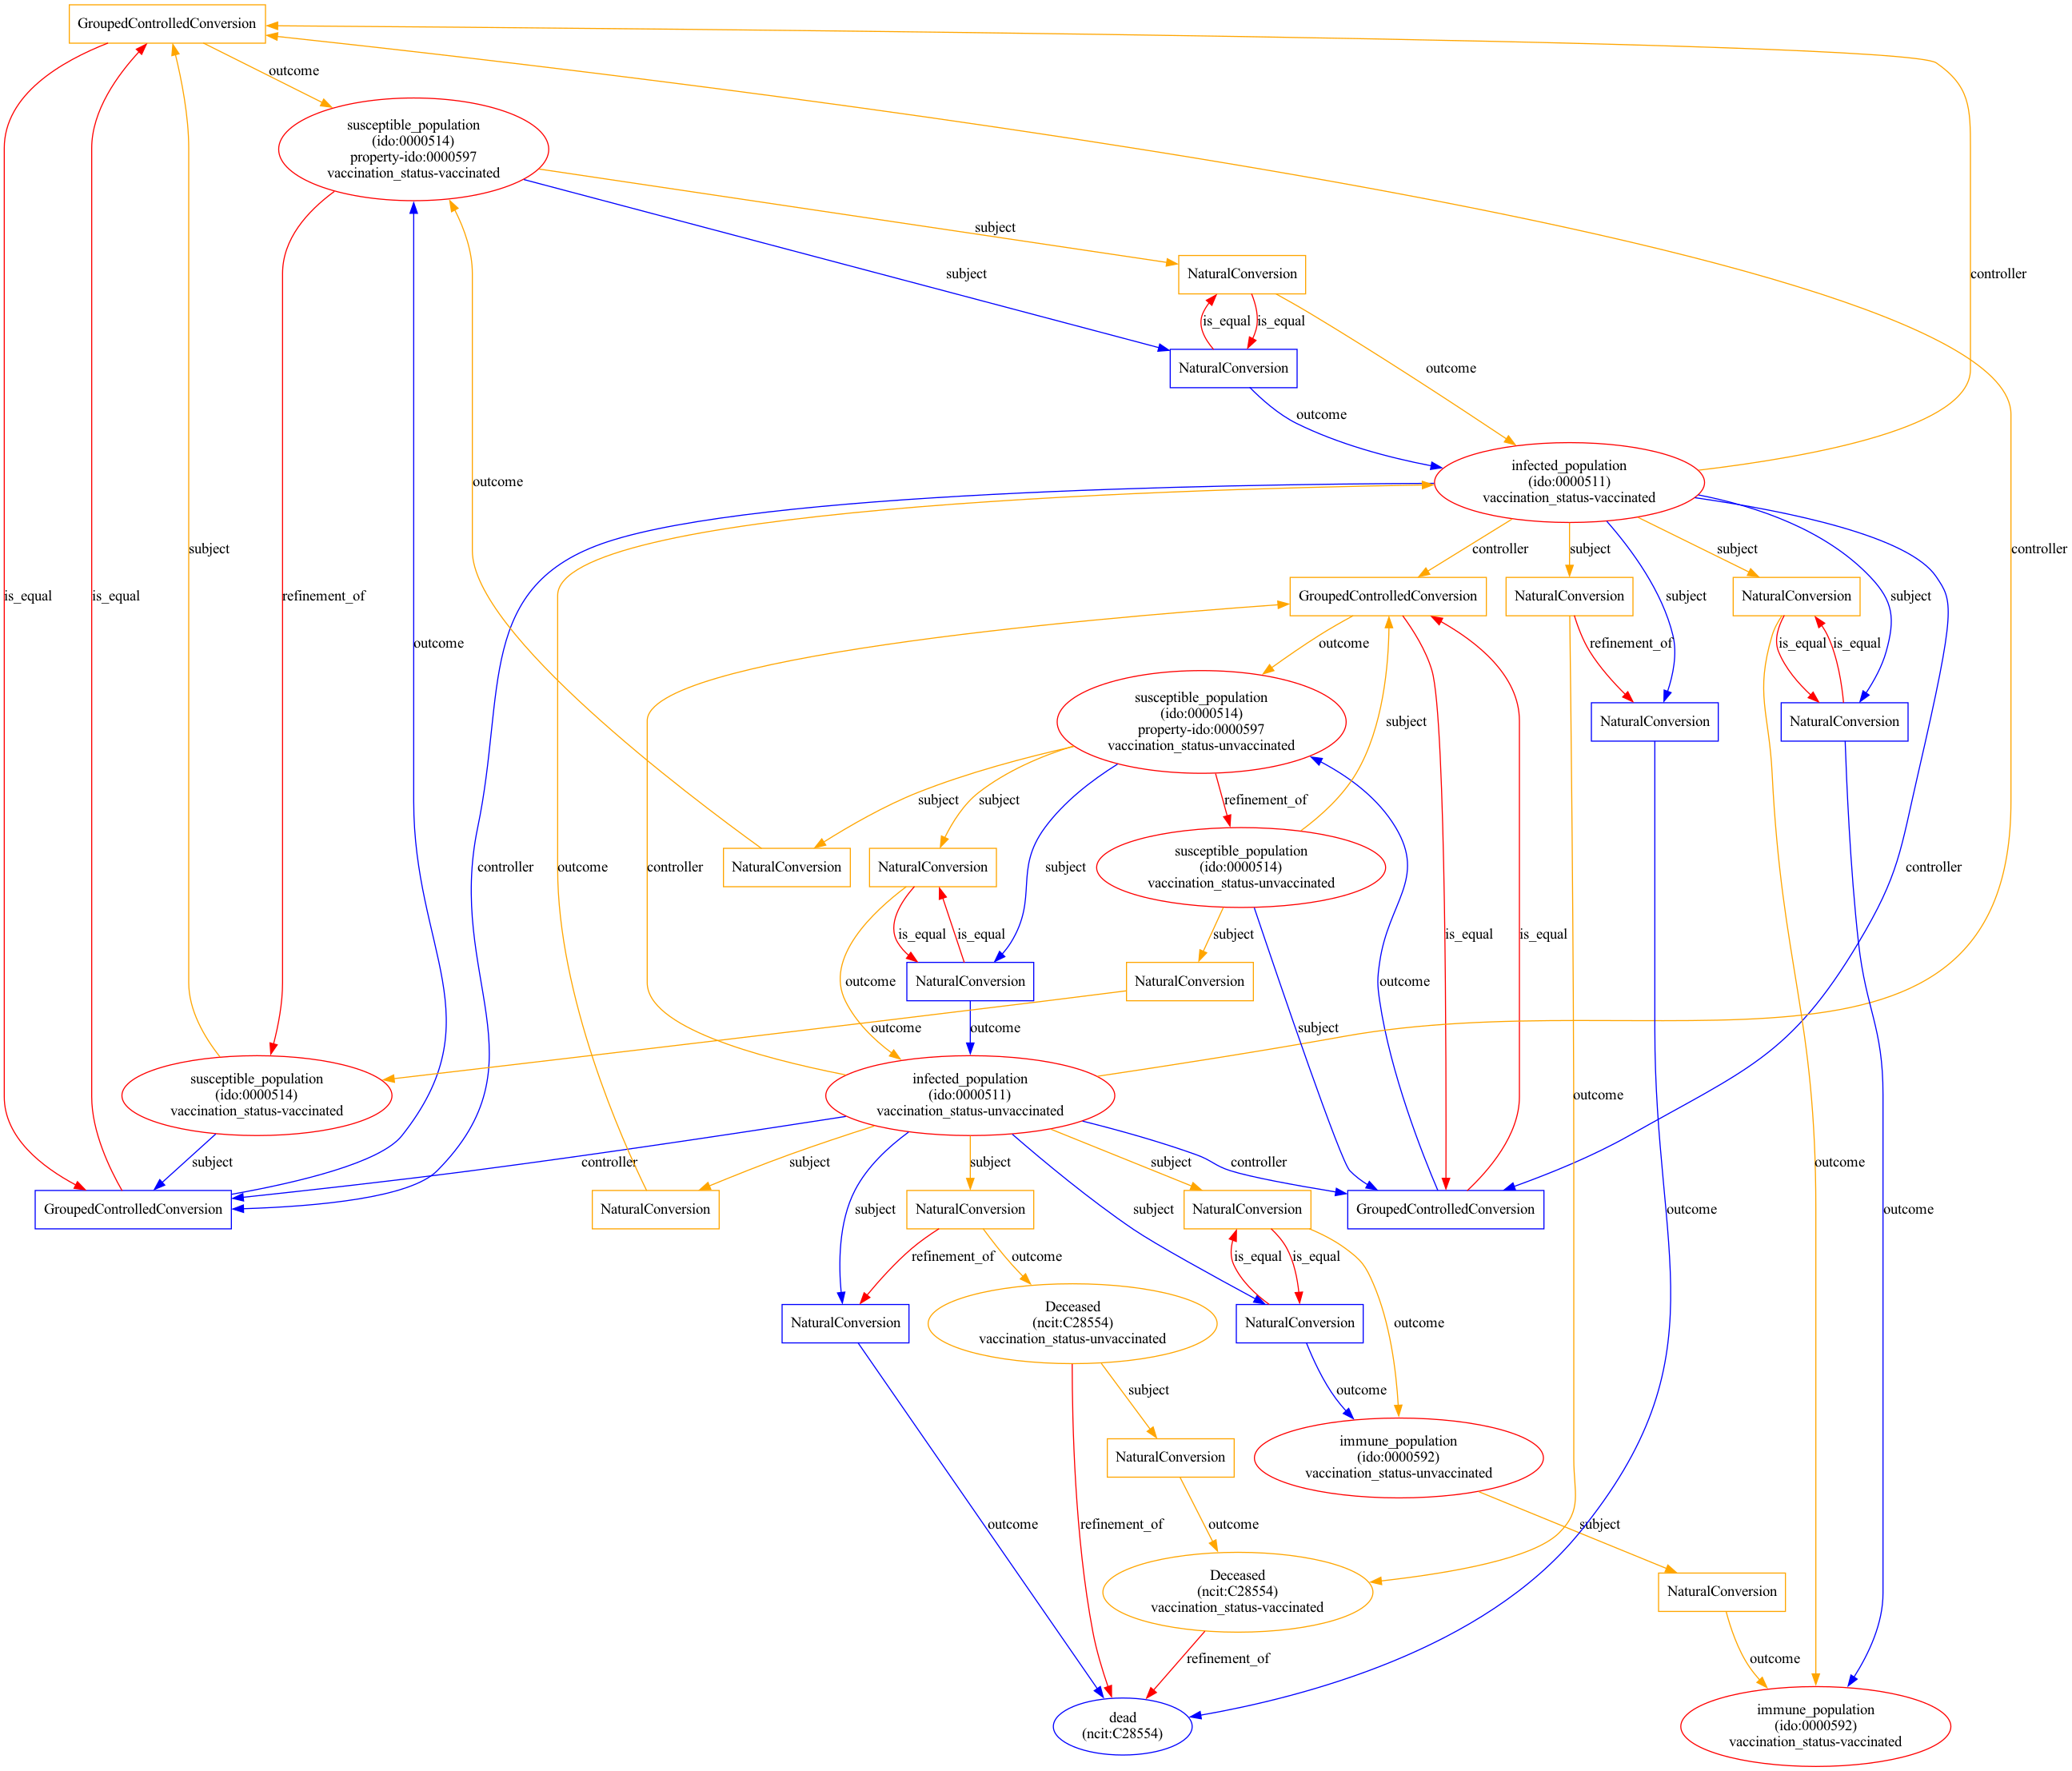

In [30]:
td = TemplateModelDelta(model_2, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

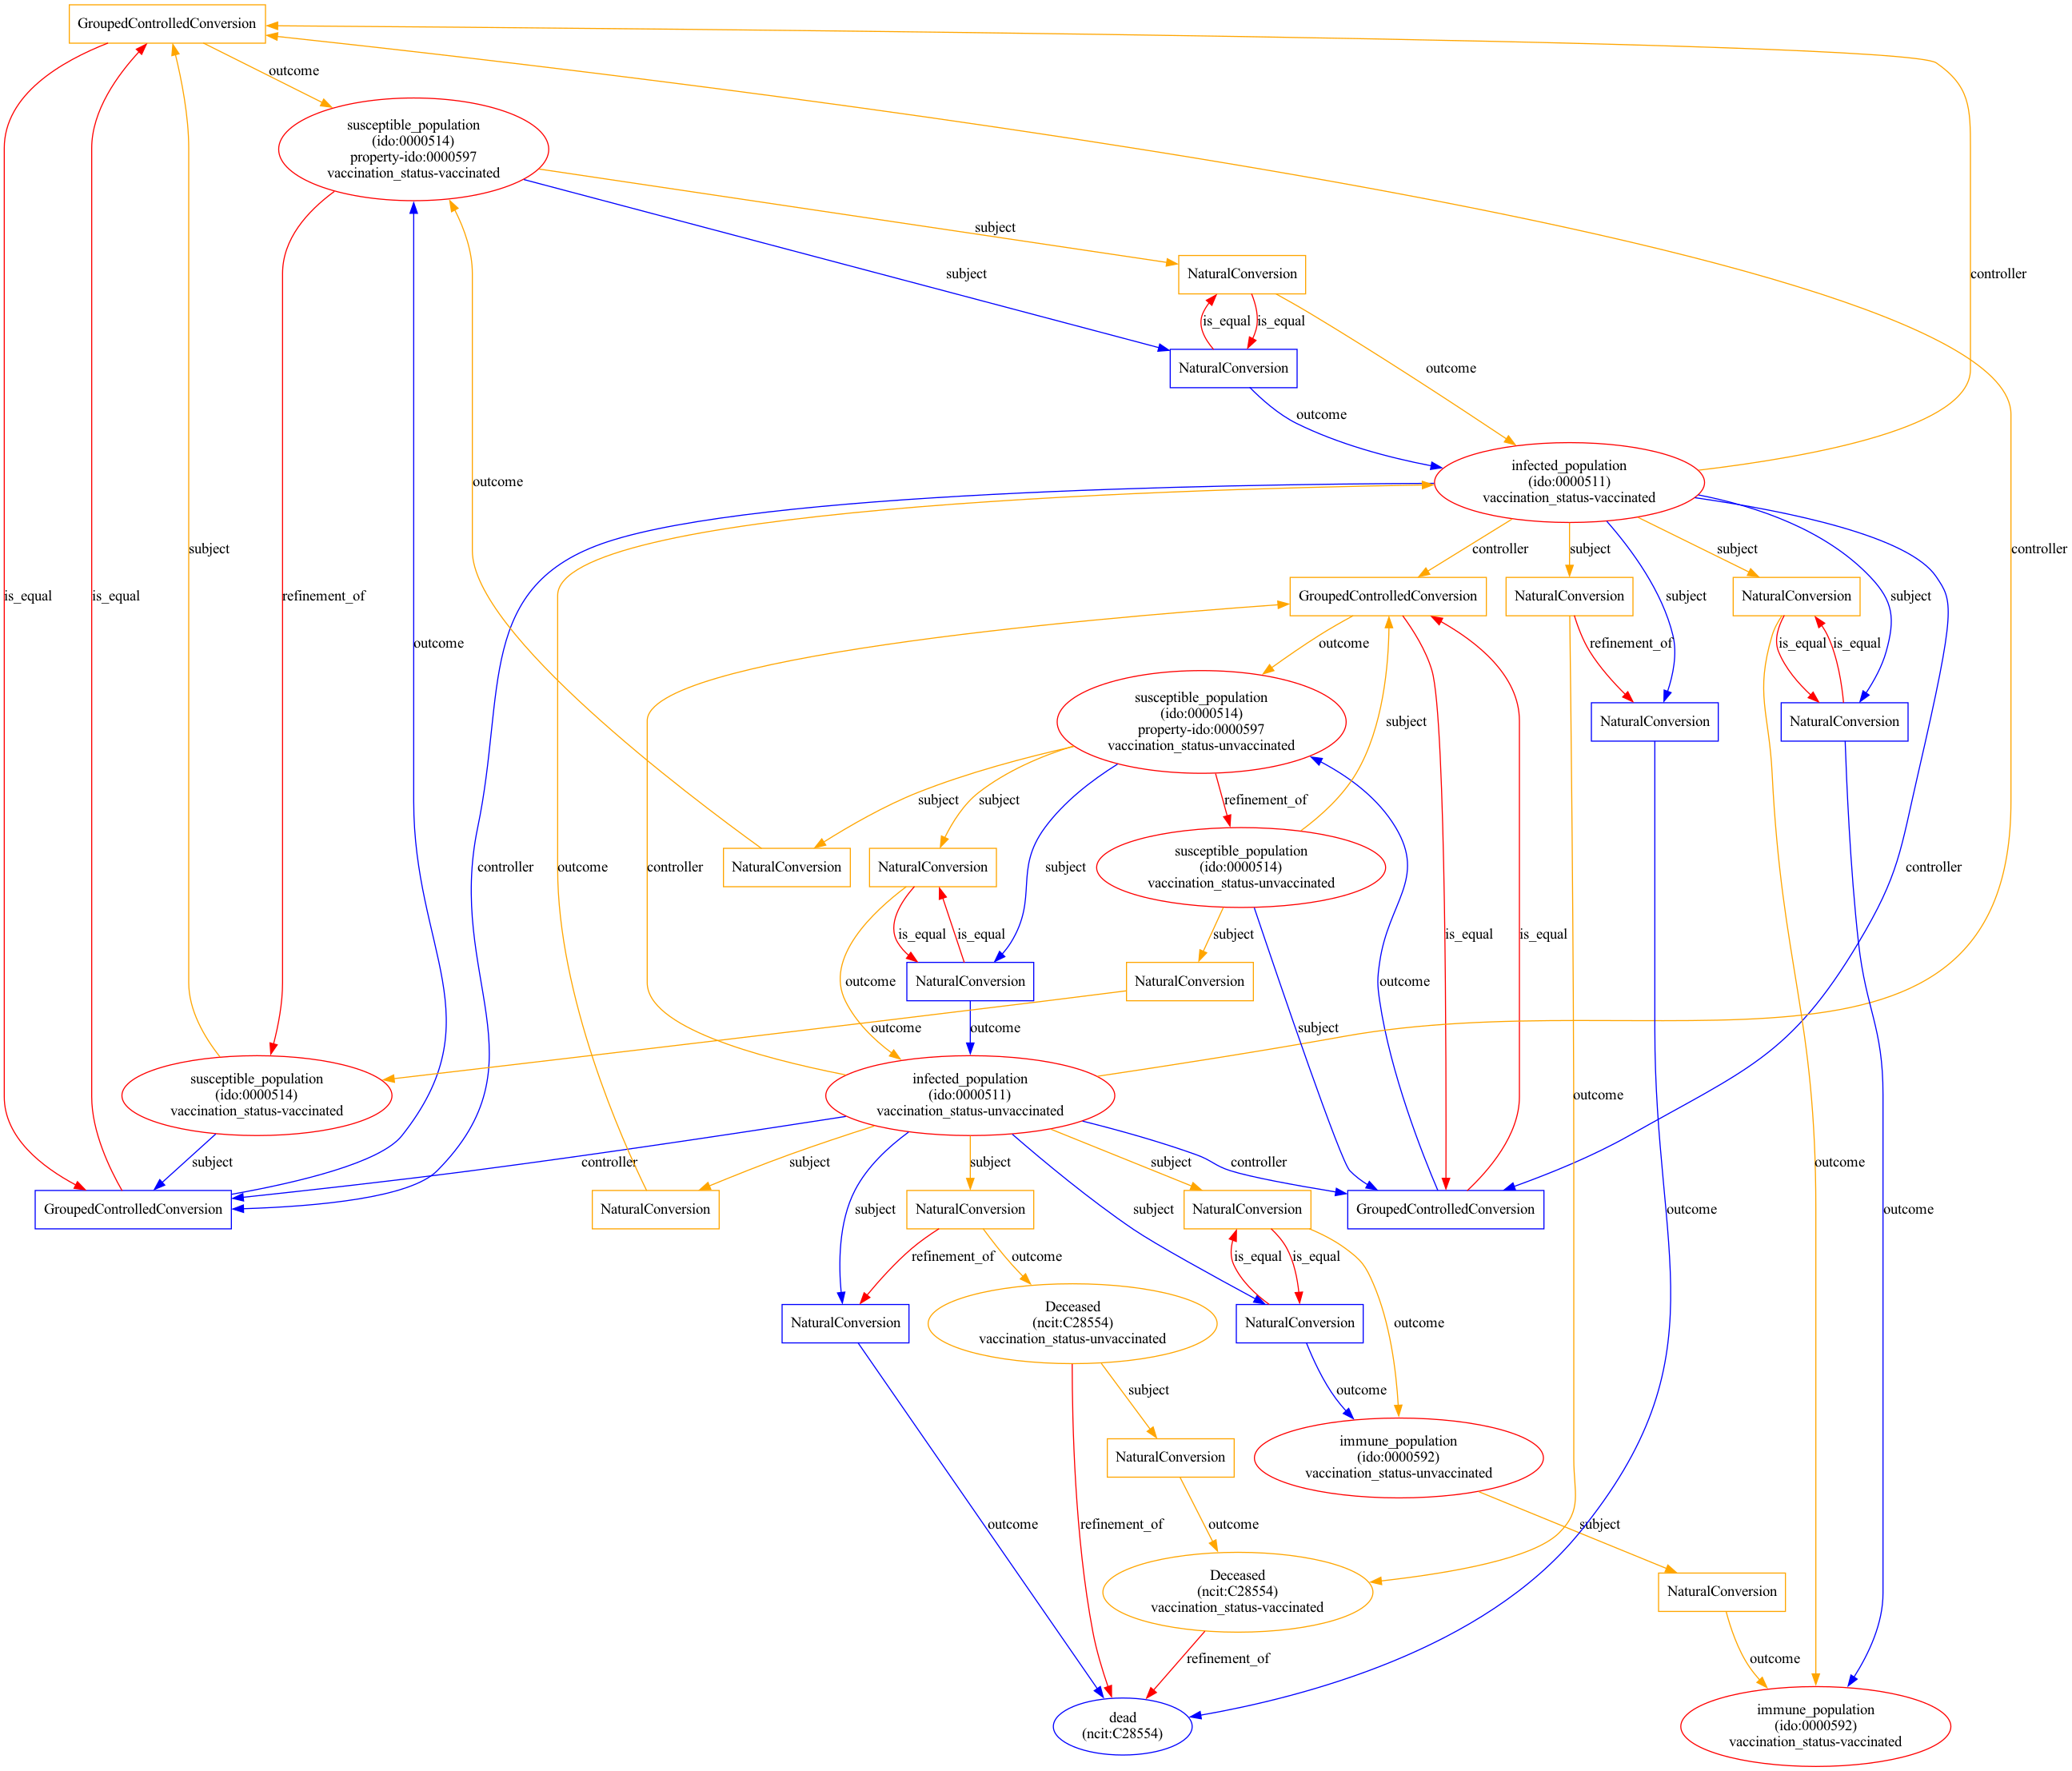

In [31]:
td = TemplateModelDelta(model_2, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

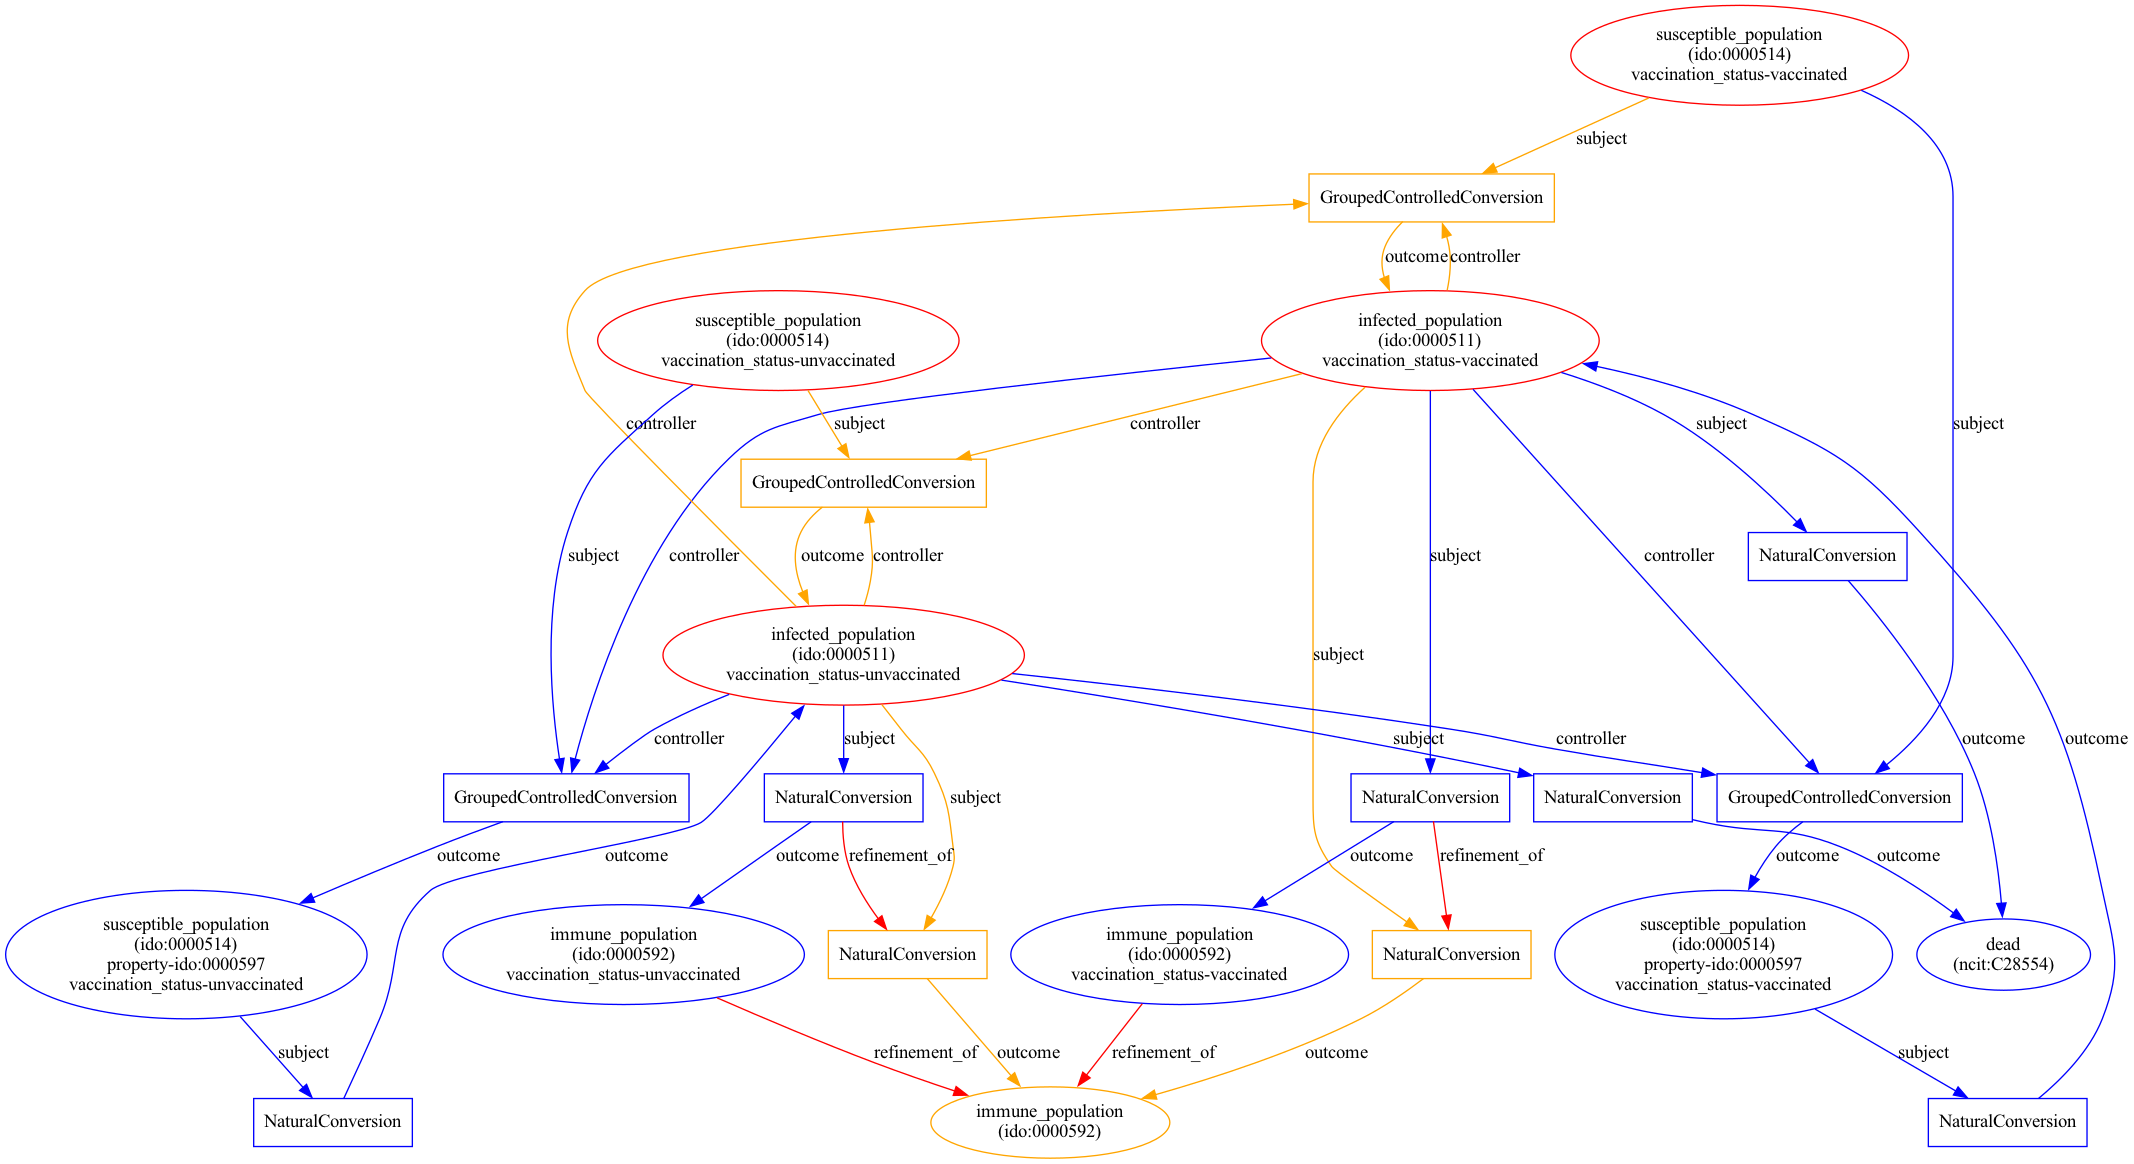

In [32]:
td = TemplateModelDelta(sviivr, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

### Rate law manipulation, model canonicalization

In [46]:
import sympy
from mira.metamodel import GroupedControlledConversion, TemplateModel, Parameter
i1, i2, S, beta, x, y, z = sympy.symbols("I1,I2,S,beta,x,y,z")
template = GroupedControlledConversion(
    controllers = [
        Concept(name='I1'),
        Concept(name='I2')
    ],
    subject=Concept(name='S'),
    outcome=Concept(name='E'),
    rate_law=0.3*(i1+i2)*S*beta/(x+y*z)
 )
template.rate_law.args[0]

S*beta*(0.3*I1 + 0.3*I2)/(x + y*z)

In [47]:
from mira.metamodel.ops import *

In [48]:
tm = TemplateModel(
    templates=[template],
    parameters={
        'beta': Parameter(name='beta', value=0.5),
        'x': Parameter(name='x', value=0.1),
        'y': Parameter(name='y', value=0.2),
        'z': Parameter(name='z', value=0.3)
    }
)

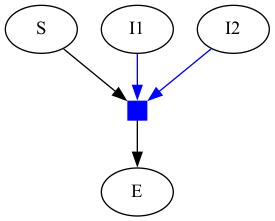

In [53]:
GraphicalModel.for_jupyter(tm, width="20%")

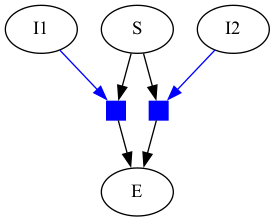

In [60]:
tm2 = simplify_rate_laws(tm)
GraphicalModel.for_jupyter(tm2, width="20%")

In [57]:
tm2.templates[0].rate_law.args[0]

0.3*I1*S*beta/(x + y*z)

In [58]:
tm2.templates[1].rate_law.args[0]

0.3*I2*S*beta/(x + y*z)

In [61]:
tm3 = aggregate_parameters(tm2)

In [62]:
tm3.templates[0].rate_law.args[0]

I1*S*mira_param_0

In [64]:
tm3.templates[1].rate_law.args[0]

I2*S*mira_param_1

In [65]:
tm3.parameters['mira_param_0'], tm3.parameters['mira_param_1']

(Parameter(name='mira_param_0', identifiers={}, context={}, value=0.9375),
 Parameter(name='mira_param_1', identifiers={}, context={}, value=0.9375))

### Model comparison for HMI integration

In [33]:
from mira.metamodel import TemplateModelComparison

In [34]:
tc = TemplateModelComparison([model_1, sviivr, seird_stratified], refinement_fun)

In [36]:
print(tc.model_comparison.model_dump_json(indent=1))

{
 "template_models": {
  "0": {
   "templates": [
    {
     "rate_law": "1.0e-7*Infected*Susceptible*beta",
     "type": "ControlledConversion",
     "controller": {
      "name": "Infected",
      "identifiers": {
       "ido": "0000511",
       "ncit": "C171133"
      },
      "context": {}
     },
     "subject": {
      "name": "Susceptible",
      "identifiers": {
       "ido": "0000514"
      },
      "context": {}
     },
     "outcome": {
      "name": "Exposed",
      "identifiers": {
       "ncit": "C171133",
       "ido": "0000514"
      },
      "context": {
       "property": "ido:0000597"
      }
     },
     "provenance": []
    },
    {
     "rate_law": "Exposed*epsilon",
     "type": "NaturalConversion",
     "subject": {
      "name": "Exposed",
      "identifiers": {
       "ncit": "C171133",
       "ido": "0000514"
      },
      "context": {
       "property": "ido:0000597"
      }
     },
     "outcome": {
      "name": "Infected",
      "identifiers": {
       

In [14]:
print(tc.model_comparison.model_dump_json(indent=1))

{
 "template_models": {
  "0": {
   "templates": [
    {
     "rate_law": "1.0e-7*Infected*Susceptible*beta",
     "type": "ControlledConversion",
     "controller": {
      "name": "Infected",
      "identifiers": {
       "ido": "0000511",
       "ncit": "C171133"
      },
      "context": {}
     },
     "subject": {
      "name": "Susceptible",
      "identifiers": {
       "ido": "0000514"
      },
      "context": {}
     },
     "outcome": {
      "name": "Exposed",
      "identifiers": {
       "ncit": "C171133",
       "ido": "0000514"
      },
      "context": {
       "property": "ido:0000597"
      }
     },
     "provenance": []
    },
    {
     "rate_law": "Exposed*epsilon",
     "type": "NaturalConversion",
     "subject": {
      "name": "Exposed",
      "identifiers": {
       "ncit": "C171133",
       "ido": "0000514"
      },
      "context": {
       "property": "ido:0000597"
      }
     },
     "outcome": {
      "name": "Infected",
      "identifiers": {
       

In [15]:
with open('mira_comparison_threeway.json', 'w') as fh:
    fh.write(tc.model_comparison.model_dump_json(indent=1))

In [16]:
tc.model_comparison.get_similarity_scores()

[{'models': (0, 1), 'score': 0.2},
 {'models': (0, 2), 'score': 0.4444444444444444},
 {'models': (1, 2), 'score': 0.2222222222222222}]

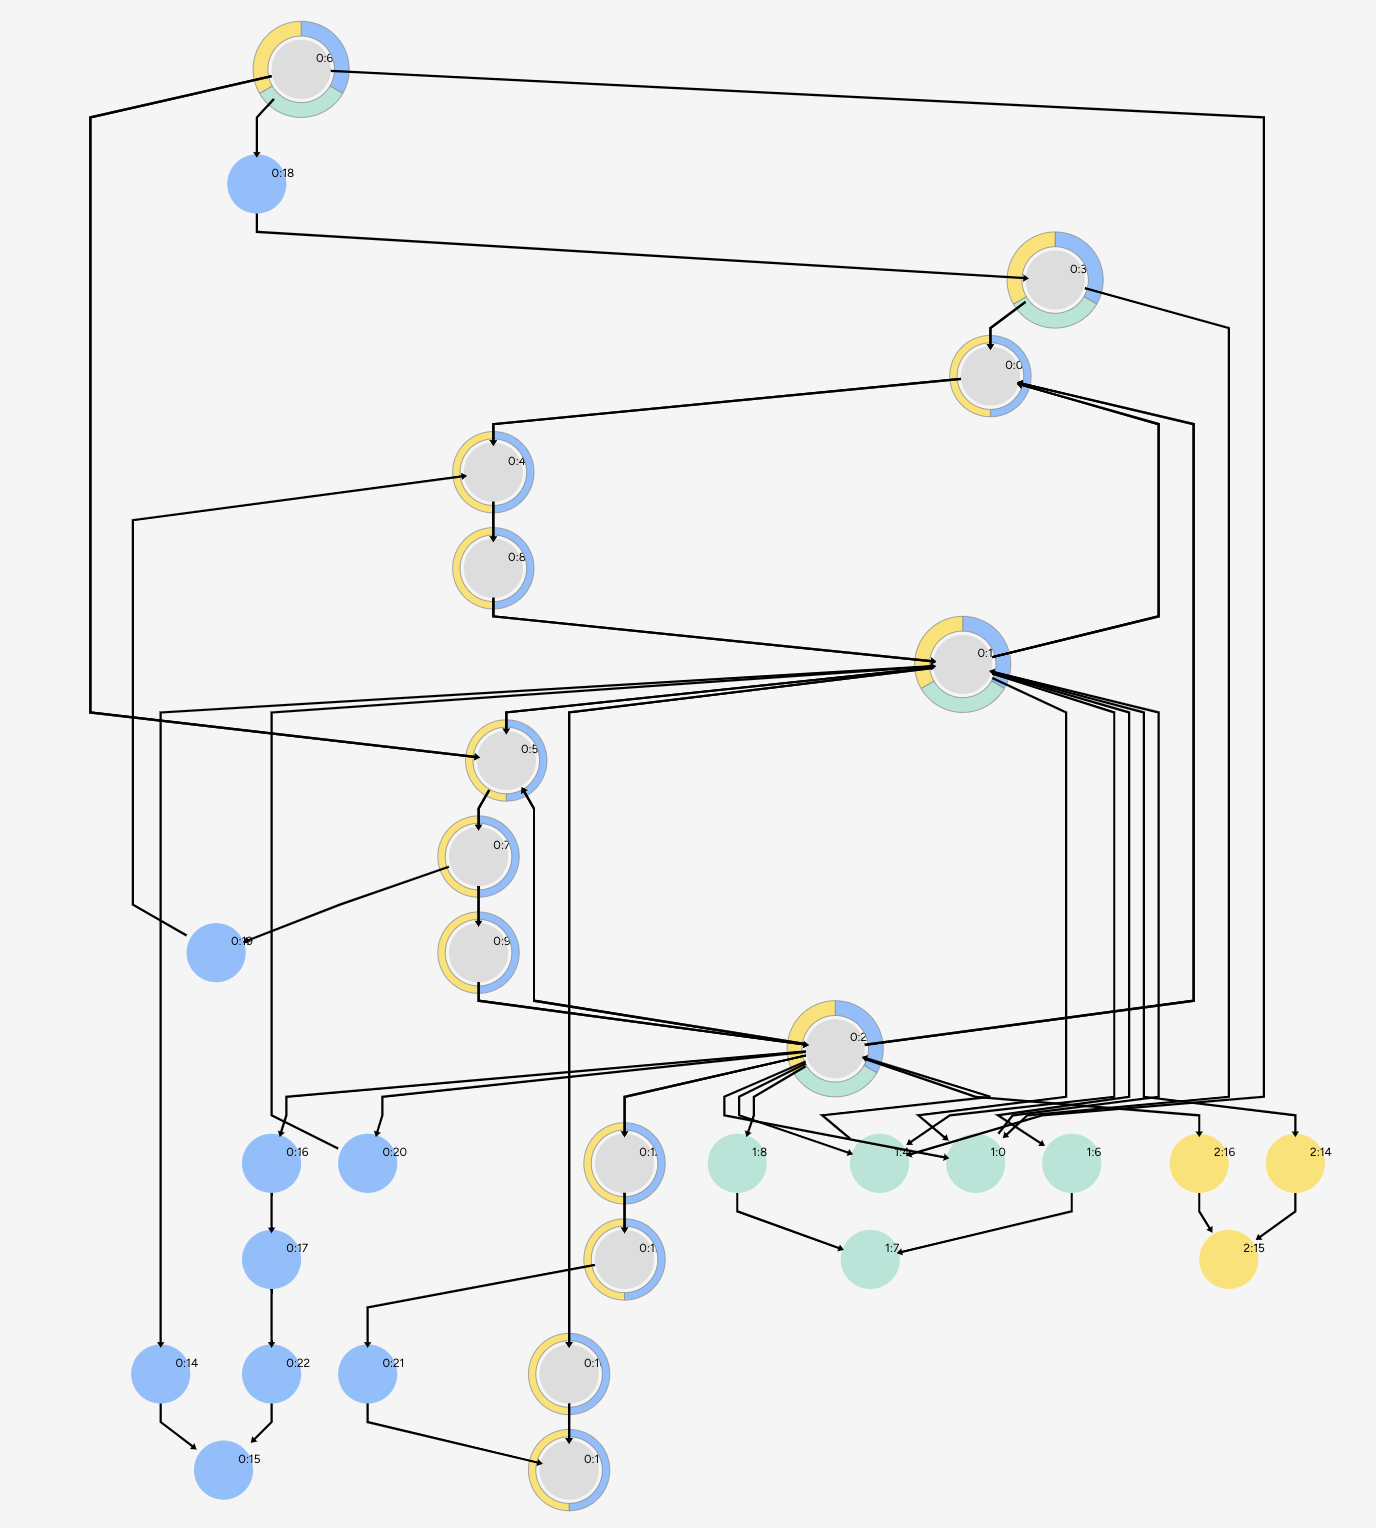